In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('abalone.csv')

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [5]:
df['age'] = df['Rings']+1.5
df = df.drop('Rings', axis = 1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [9]:
numerical_features = df.select_dtypes(include = [np.number]).columns
categorical_features = df.select_dtypes(include = [np.object]).columns

C:\Users\devas\AppData\Local\Temp\ipykernel_13476\3796453440.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = df.select_dtypes(include = [np.object]).columns


In [10]:
numerical_features

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age'],
      dtype='object')

In [11]:
categorical_features

Index(['Sex'], dtype='object')

In [13]:
from sklearn.linear_model import LinearRegression


In [14]:
lm = LinearRegression()
lm.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [16]:
lm = LinearRegression()
lm.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [17]:
X = df.drop('age', axis = 1)
y = df['age']

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest

<Axes: xlabel='Sex', ylabel='count'>

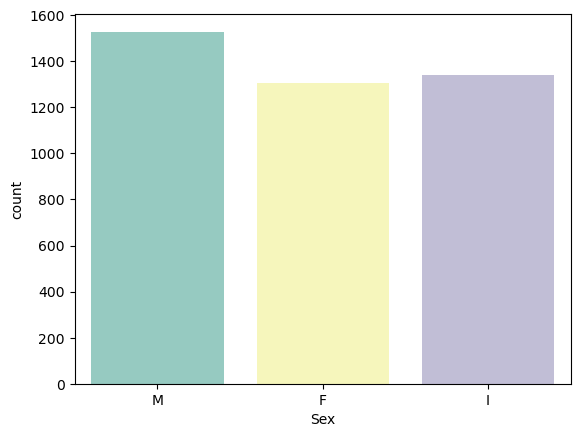

In [20]:
sns.countplot(x = 'Sex', data = df, palette = 'Set3')

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [44]:
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
s = mean_squared_error(y_train, y_train_pred)
print('Mean Squared error of training set :%2f'%s)

p = mean_squared_error(y_test, y_test_pred)
print('Mean Squared error of testing set :%2f'%p)

Mean Squared error of training set :3.497683
Mean Squared error of testing set :3.779127


In [46]:
from sklearn.metrics import r2_score
s = r2_score(y_train, y_train_pred)
print('R2 Score of training set:%.2f'%s)

p = r2_score(y_test, y_test_pred)
print('R2 Score of testing set:%.2f'%p)

R2 Score of training set:0.55
R2 Score of testing set:0.49


In [47]:
from sklearn.linear_model import Ridge

In [49]:
from sklearn.svm import SVR


In [51]:
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

svr.score(X_train, y_train)

0.4413189917695457

In [52]:
svr.score(X_test, y_test)

0.4344540511844439

In [54]:
regr = RandomForestRegressor(max_depth=2, random_state=0,
                              n_estimators=100)

In [55]:
regr.fit(X_train, y_train)
regr.fit(X_test, y_test)

RandomForestRegressor(max_depth=2, random_state=0)

In [56]:
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

regr.score(X_train, y_train)

0.4244364643742615

In [57]:
regr.score(X_test, y_test)

0.4383626117948545